In [1]:
import nltk
import pandas as pd
import re
import string
from nltk.stem import WordNetLemmatizer 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.stem import WordNetLemmatizer 
  


%matplotlib inline

In [2]:
# Reading the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Dividing into Positive and Negative Reviews

In [4]:
print("The number of Positive reviews=", (dataset["Liked"]==1).sum())
print("The number of Negative reviews=", (dataset["Liked"]==0).sum())

The number of Positive reviews= 500
The number of Negative reviews= 500


In [5]:
pos_rev=" "
neg_rev=" "

In [6]:
len(dataset)

1000

In [7]:
for i in range(0,1000):
    if dataset["Liked"][i]==1:
        pos_rev=pos_rev+" "+dataset["Review"][i]
    if dataset["Liked"][i]==0:
        neg_rev=neg_rev+" "+dataset["Review"][i]   

In [8]:
print("Length of positive reviews-",len(pos_rev))
print("")
print("Part of positive reviews-")
print(pos_rev[1000:2000])

Length of positive reviews- 28441

Part of positive reviews-
 service. The only thing I did like was the prime rib and dessert section. The burger is good beef, cooked just right. If you want a sandwich just go to any Firehouse!!!!! My side Greek salad with the Greek dressing was so tasty, and the pita and hummus was very refreshing. We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside. He came running after us when he realized my husband had left his sunglasses on the table. Their chow mein is so good! The portion was huge! Loved it...friendly servers, great food, wonderful and imaginative menu. The salad had just the right amount of sauce to not over power the scallop, which was perfectly cooked. This place receives stars for their APPETIZERS!!! The cocktails are all handmade and delicious. We'd definitely go back here again. We are so glad we found this place. Great food and service, huge portions and they give a military discount. Always

In [9]:
print("Length of negative reviews-",len(neg_rev))
print("")
print("Part of negative reviews-")
print(neg_rev[1000:2000])

Length of negative reviews- 30876

Part of negative reviews-
ce, the waiter made me feel like I was stupid every time he came to the table. Service sucks. There is not a deal good enough that would drag me into that establishment again. Hard to judge whether these sides were good because we were grossed out by the melted styrofoam and didn't want to eat it for fear of getting sick. Frozen pucks of disgust, with some of the worst people behind the register. It's too bad the food is so damn generic. They have horrible attitudes towards customers, and talk down to each one when customers don't enjoy their food. The Heart Attack Grill in downtown Vegas is an absolutely flat-lined excuse for a restaurant. Not much seafood and like 5 strings of pasta at the bottom. The ripped banana was not only ripped, but petrified and tasteless. At least think to refill my water before I struggle to wave you over for 10 minutes. We got the food and apparently they have never heard of salt and the batter o

# Positive Reviews

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
#removing the punctuations

text_nopunct_pos=''

text_nopunct_pos= "".join([char for char in pos_rev if char not in string.punctuation])

In [12]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [13]:
#Tokenizing the text
pos_tokens = tokenizer.tokenize(text_nopunct_pos)
len(pos_tokens)

5118

In [14]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words_pos = []

# Looping through the tokens and make them lower case
for word in pos_tokens:
    words_pos.append(word.lower())

In [15]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.

stopwords = nltk.corpus.stopwords.words('english')

In [16]:
final_words_pos=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words_pos:
    if word not in stopwords:
        final_words_pos.append(word)

In [17]:
wn = WordNetLemmatizer() 

In [18]:
lem_words_pos=[]

for word in final_words_pos:
    word=wn.lemmatize(word)
    lem_words_pos.append(word)

In [19]:
#The frequency distribution of the words
freq_dist_pos = nltk.FreqDist(lem_words_pos)

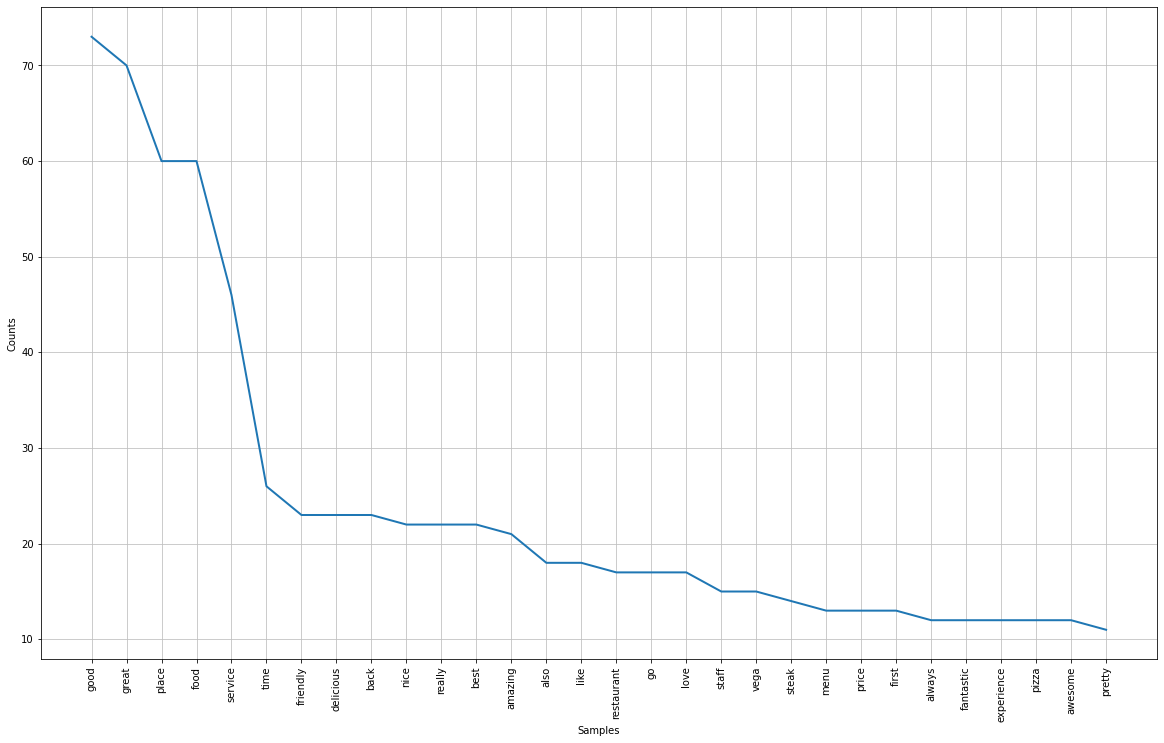

In [20]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist_pos.plot(30)

1. We can see the word frequency here.
2. Positive words find a higher frequency here.

In [21]:
#converting into string

res_pos=' '.join([i for i in lem_words_pos if not i.isdigit()])

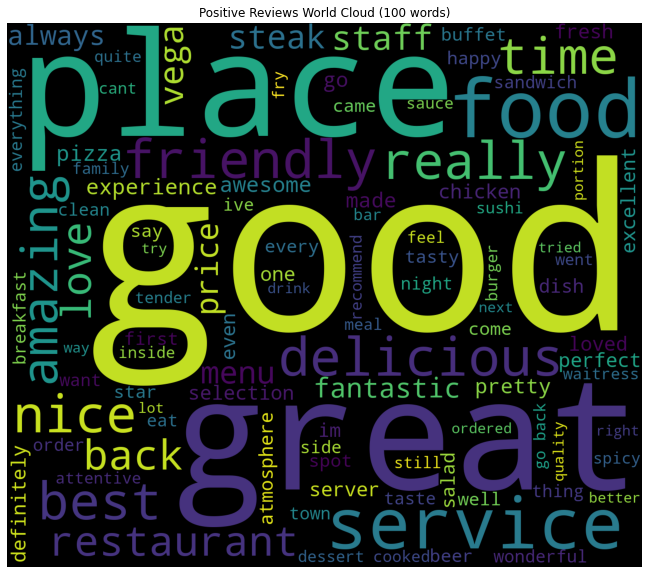

In [22]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_pos)


plt.imshow(wordcloud)
plt.title('Positive Reviews World Cloud (100 words)')
plt.axis('off')
plt.show()

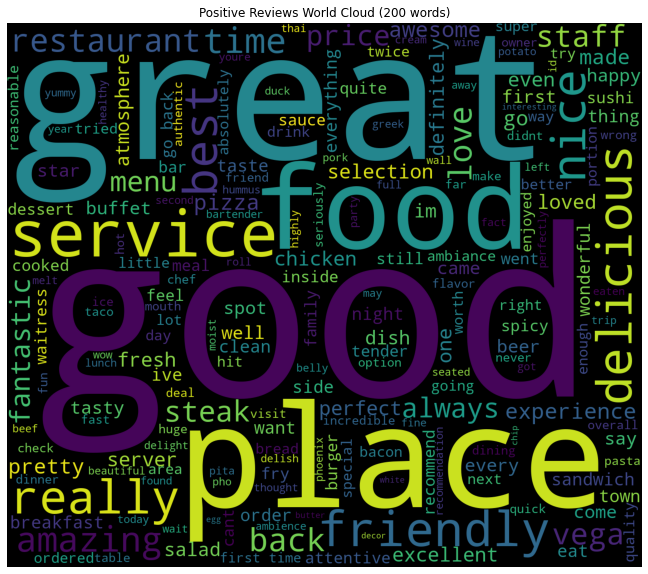

In [23]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res_pos)


plt.imshow(wordcloud)
plt.title('Positive Reviews World Cloud (200 words)')
plt.axis('off')
plt.show()

1. The wordcloud makes it clear which words are more common.
2. As usual, positive words are in abundant.
3. Great and good seem to be the largest most abundant words.

# Negative reviews

In [24]:
text_nopunct_neg=''

text_nopunct_neg= "".join([char for char in neg_rev if char not in string.punctuation])

In [25]:
#Tokenizing the text
neg_tokens = tokenizer.tokenize(text_nopunct_neg)
len(neg_tokens)

5729

In [26]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words_neg = []

# Looping through the tokens and make them lower case
for word in neg_tokens:
    words_neg.append(word.lower())

In [27]:
final_words_neg=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words_neg:
    if word not in stopwords:
        final_words_neg.append(word)

In [28]:
lem_words_neg=[]

for word in final_words_neg:
    word=wn.lemmatize(word)
    lem_words_neg.append(word)

In [29]:
#The frequency distribution of the words
freq_dist_neg = nltk.FreqDist(lem_words_neg)

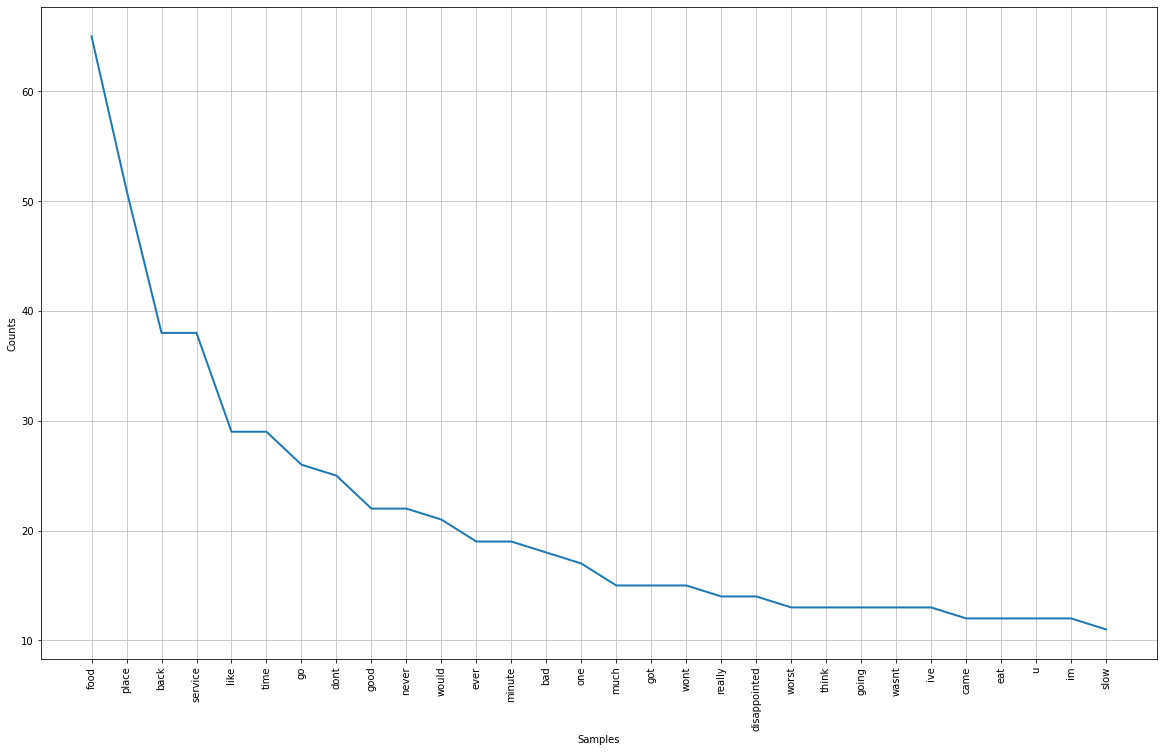

In [30]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist_neg.plot(30)

1. Negative words are mainly here.
2. It explains why the reviews are negative.

In [31]:
#converting into string

res_neg=' '.join([i for i in lem_words_neg if not i.isdigit()])

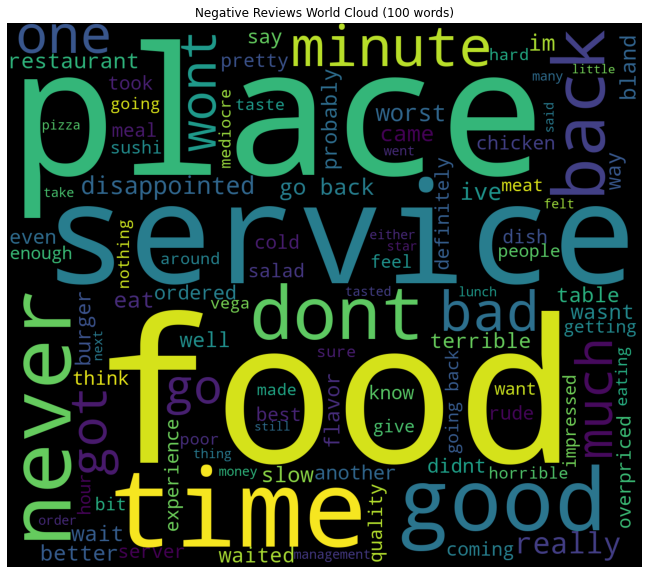

In [32]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_neg)


plt.imshow(wordcloud)
plt.title('Negative Reviews World Cloud (100 words)')
plt.axis('off')
plt.show()

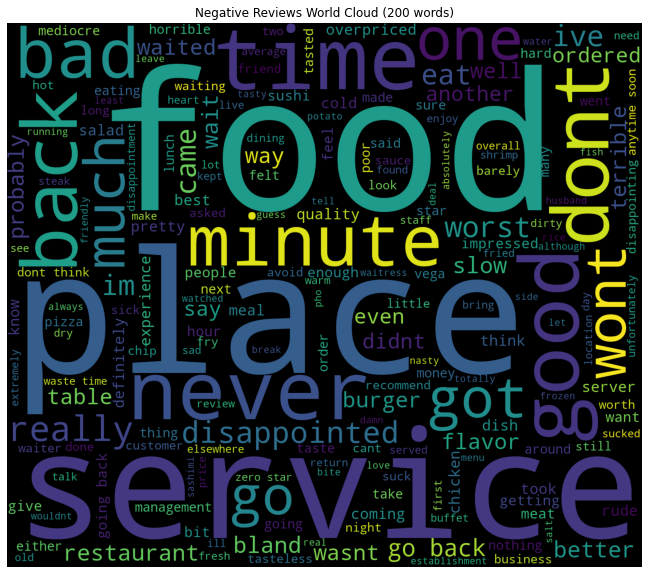

In [33]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res_neg)


plt.imshow(wordcloud)
plt.title('Negative Reviews World Cloud (200 words)')
plt.axis('off')
plt.show()

1. The word cloud makes it clear why these reviews fall under negative reviews.
2. Words which might be used in a complain are used here. 

# Take aways

1. The chief consumer reviews can be used to understand the pros and cons of the restaurant. 
2. The main key words of the positive and negative reviews do give a gist of the customer sentiment. 
3. Such analysis with larger amounts of data can help us understand how the restaurant is going to perform.